In [427]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [428]:
df = pd.read_csv('eksik_veri.csv')

In [429]:
df

,ulke,boy,kilo,yas,cinsiyet
0,tr,130,30,10.0,e
1,tr,125,36,11.0,e
2,tr,135,34,10.0,k
3,tr,133,30,9.0,k
4,tr,129,38,12.0,e
5,tr,180,90,30.0,e
6,tr,190,80,25.0,e
7,tr,175,90,35.0,e
8,tr,177,60,22.0,k
9,us,185,105,33.0,e


In [430]:
df.isnull().sum()

ulke        0
boy         0
kilo        0
yas         2
cinsiyet    0
dtype: int64

# Eksik Veriler

In [431]:
from sklearn.impute import SimpleImputer
# Eksik (NaN) verileri otomatik olarak tamamlamaya (doldurmaya) yarayan bir araçtır.

imputer = SimpleImputer(missing_values=np.nan , strategy='mean')
imputer

# SimpleImputer(
#     missing_values=np.nan,          # Eksik sayılan değer
#     strategy="mean",                # mean | median | most_frequent | constant
#     fill_value=None,                # strategy="constant" ise kullanılır
#     copy=True,                      # Girdi kopyalansın mı?
#     add_indicator=False,            # Eksik olup olmadığını gösteren bayrak sütunları ekle
# )

# "mean" → sayısal sütunlarda ortalama ile doldurur.
# "median" → aykırı değerlere dayanıklı olduğu için sayısalda çok tercih edilir.
# "most_frequent" → kategorik ya da sayısal sütunlarda en sık görüleni yazar.
# "constant" → sabit bir değerle doldurur (ör. "Unknown", 0). Bu durumda fill_value verilir. (Vermezsen sayısalda 0, nesnede "missing_value" kullanılır.)

,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [432]:
df.head()

,ulke,boy,kilo,yas,cinsiyet
0,tr,130,30,10.0,e
1,tr,125,36,11.0,e
2,tr,135,34,10.0,k
3,tr,133,30,9.0,k
4,tr,129,38,12.0,e


In [433]:
yas = df.iloc[:,1:4].values
yas

array([[130.,  30.,  10.],
       [125.,  36.,  11.],
       [135.,  34.,  10.],
       [133.,  30.,   9.],
       [129.,  38.,  12.],
       [180.,  90.,  30.],
       [190.,  80.,  25.],
       [175.,  90.,  35.],
       [177.,  60.,  22.],
       [185., 105.,  33.],
       [165.,  55.,  27.],
       [155.,  50.,  44.],
       [160.,  58.,  nan],
       [162.,  59.,  41.],
       [167.,  62.,  55.],
       [174.,  70.,  47.],
       [193.,  90.,  nan],
       [187.,  80.,  27.],
       [183.,  88.,  28.],
       [159.,  40.,  29.],
       [164.,  66.,  32.],
       [166.,  56.,  42.]])

In [434]:
imputer = imputer.fit(yas[:,1:4])
imputer

,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [435]:
yas[:,1:4] = imputer.transform(yas[:,1:4])
yas

array([[130.  ,  30.  ,  10.  ],
       [125.  ,  36.  ,  11.  ],
       [135.  ,  34.  ,  10.  ],
       [133.  ,  30.  ,   9.  ],
       [129.  ,  38.  ,  12.  ],
       [180.  ,  90.  ,  30.  ],
       [190.  ,  80.  ,  25.  ],
       [175.  ,  90.  ,  35.  ],
       [177.  ,  60.  ,  22.  ],
       [185.  , 105.  ,  33.  ],
       [165.  ,  55.  ,  27.  ],
       [155.  ,  50.  ,  44.  ],
       [160.  ,  58.  ,  28.45],
       [162.  ,  59.  ,  41.  ],
       [167.  ,  62.  ,  55.  ],
       [174.  ,  70.  ,  47.  ],
       [193.  ,  90.  ,  28.45],
       [187.  ,  80.  ,  27.  ],
       [183.  ,  88.  ,  28.  ],
       [159.  ,  40.  ,  29.  ],
       [164.  ,  66.  ,  32.  ],
       [166.  ,  56.  ,  42.  ]])

# Kategorik Veriler

In [436]:
ulke = df.iloc[:,:1].values
ulke

array([['tr'],
       ['tr'],
       ['tr'],
       ['tr'],
       ['tr'],
       ['tr'],
       ['tr'],
       ['tr'],
       ['tr'],
       ['us'],
       ['us'],
       ['us'],
       ['us'],
       ['us'],
       ['us'],
       ['fr'],
       ['fr'],
       ['fr'],
       ['fr'],
       ['fr'],
       ['fr'],
       ['fr']], dtype=object)

In [437]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
# LabelEncoder, kategorik verileri (örneğin tr, us, fr) 0, 1, 2… gibi etiketlere dönüştürür.
# kısaca metinleri sayıya çevirir 1 , 2, 3,4... gibi

In [438]:
ulke[:,0] = le.fit_transform(df.iloc[:,0])
ulke
# df.iloc[:,0] → df'nin ilk sütunu olan ulke (ülke isimleri) alınır.
# le.fit_transform(...) → Ülkeleri sayılara çevirir (örnek: tr → 2, us → 1, fr → 0)
# ulke[:,0] → Bu sayısal değerler ulke adlı NumPy dizisinin ilk sütununa yazılır.

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=object)

In [439]:
ohe = preprocessing.OneHotEncoder()
# OneHotEncoder, kategorik verileri makine öğrenmesi algoritmaları için sayısal verilere çeviren bir dönüştürücüdür. Ancak bunu etiket değil, binary (0 ve 1) sütunlara ayırarak yapar.

ulke = ohe.fit_transform(ulke).toarray()
ulke
# toarray() kısmı → Dönüşen veriyi numpy dizisi haline getirir.

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

# Verilerin Birleştirilmesi

In [440]:
df.shape

(22, 5)

In [441]:
sonuc = pd.DataFrame(data=ulke , index=range(22) , columns= ['fr' , 'tr' , 'us'])
sonuc

,fr,tr,us
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
5,0.0,1.0,0.0
6,0.0,1.0,0.0
7,0.0,1.0,0.0
8,0.0,1.0,0.0
9,0.0,0.0,1.0


In [442]:
sonuc2 = pd.DataFrame(data=yas , index=range(22) , columns=['boy', 'kilo' , 'yas'])
sonuc2

,boy,kilo,yas
0,130.0,30.0,10.00
1,125.0,36.0,11.00
2,135.0,34.0,10.00
3,133.0,30.0,9.00
4,129.0,38.0,12.00
5,180.0,90.0,30.00
6,190.0,80.0,25.00
7,175.0,90.0,35.00
8,177.0,60.0,22.00
9,185.0,105.0,33.00


In [443]:
cinsiyet = df.iloc[:,-1].values
cinsiyet

array(['e', 'e', 'k', 'k', 'e', 'e', 'e', 'e', 'k', 'e', 'k', 'k', 'k',
       'k', 'k', 'e', 'e', 'e', 'e', 'k', 'k', 'k'], dtype=object)

In [444]:
sonuc3 = pd.DataFrame(data=cinsiyet , index=range(22) , columns= ['cinsiyet'])
sonuc3

,cinsiyet
0,e
1,e
2,k
3,k
4,e
5,e
6,e
7,e
8,k
9,e


In [445]:
s = pd.concat([sonuc , sonuc2] , axis=1)
s

,fr,tr,us,boy,kilo,yas
0,0.0,1.0,0.0,130.0,30.0,10.00
1,0.0,1.0,0.0,125.0,36.0,11.00
2,0.0,1.0,0.0,135.0,34.0,10.00
3,0.0,1.0,0.0,133.0,30.0,9.00
4,0.0,1.0,0.0,129.0,38.0,12.00
5,0.0,1.0,0.0,180.0,90.0,30.00
6,0.0,1.0,0.0,190.0,80.0,25.00
7,0.0,1.0,0.0,175.0,90.0,35.00
8,0.0,1.0,0.0,177.0,60.0,22.00
9,0.0,0.0,1.0,185.0,105.0,33.00


In [446]:
s2 = pd.concat([s , sonuc3 ] , axis=1)
s2

,fr,tr,us,boy,kilo,yas,cinsiyet
0,0.0,1.0,0.0,130.0,30.0,10.00,e
1,0.0,1.0,0.0,125.0,36.0,11.00,e
2,0.0,1.0,0.0,135.0,34.0,10.00,k
3,0.0,1.0,0.0,133.0,30.0,9.00,k
4,0.0,1.0,0.0,129.0,38.0,12.00,e
5,0.0,1.0,0.0,180.0,90.0,30.00,e
6,0.0,1.0,0.0,190.0,80.0,25.00,e
7,0.0,1.0,0.0,175.0,90.0,35.00,e
8,0.0,1.0,0.0,177.0,60.0,22.00,k
9,0.0,0.0,1.0,185.0,105.0,33.00,e


In [447]:
sonuc3

,cinsiyet
0,e
1,e
2,k
3,k
4,e
5,e
6,e
7,e
8,k
9,e


# Veri kümesinin Eğitim ve Test Olarak Bölünmesi

In [448]:
from sklearn.model_selection import train_test_split
# bağımsız        #bağımlı                      #bağımsız(s) #bağımlı(sonuc3) 
x_train , x_test , y_train ,y_test = train_test_split(s , sonuc3 , test_size=0.33 , random_state=0 )

# random_state=0 -> Verilerin karıştırılma sırasını sabitler, böylece her çalıştırmada aynı sonucu alırsın.
# test_size=0.33 Verinin ne kadarının test için ayrılacağını belirler:
# 0.33 → %33’ü test, %67’si eğitim verisi olur.

# Öznitelik Ölçekleme

In [449]:
from sklearn.preprocessing import StandardScaler

In [450]:
sc = StandardScaler()
# StandardScaler, verileri z-score standardizasyonuna göre dönüştürür
# Yani her sütundaki değerler:
# Ortalama (mean) = 0
# Standart sapma (std) = 1
# hale gelir.
# Bu, özellikle mesafe tabanlı algoritmalar (örneğin KNN, SVM, Lojistik Regresyon) için çok önemlidir.


In [451]:
X_train = sc.fit_transform(x_train)
X_train

array([[-0.63245553,  0.8660254 , -0.40824829,  0.45049444, -0.29657884,
        -0.24717129],
       [-0.63245553,  0.8660254 , -0.40824829,  1.00824945,  0.5096549 ,
         0.03416189],
       [ 1.58113883, -1.15470054, -0.40824829,  1.13696215,  0.91277178,
         0.35769504],
       [-0.63245553,  0.8660254 , -0.40824829, -1.6089087 , -1.18343596,
        -1.18494855],
       [-0.63245553,  0.8660254 , -0.40824829, -1.35148331, -1.34468271,
        -1.372504  ],
       [-0.63245553,  0.8660254 , -0.40824829,  0.57920713,  0.91277178,
         0.50305051],
       [ 1.58113883, -1.15470054, -0.40824829,  0.87953676,  0.5096549 ,
         0.22171734],
       [-0.63245553, -1.15470054,  2.44948974,  0.79372829,  1.51744708,
         0.78438369],
       [-0.63245553,  0.8660254 , -0.40824829,  0.36468597,  0.91277178,
         0.97193914],
       [ 1.58113883, -1.15470054, -0.40824829,  0.70791983,  0.8321484 ,
         0.31549506],
       [-0.63245553,  0.8660254 , -0.40824829, -1.

In [452]:
X_test = sc.fit_transform(x_test)
X_test

array([[ 1.29099445, -0.37796447, -1.        ,  0.47240026,  1.32853794,
        -0.24991255],
       [-0.77459667, -0.37796447,  1.        ,  0.54952683,  0.20439045,
        -0.64977262],
       [-0.77459667, -0.37796447,  1.        ,  0.70377998,  0.91975703,
         1.58944379],
       [-0.77459667, -0.37796447,  1.        ,  0.31814711,  0.61317136,
         0.46983559],
       [-0.77459667,  2.64575131, -1.        , -2.53553608, -1.73731884,
        -1.92932485],
       [ 1.29099445, -0.37796447, -1.        ,  0.6266534 ,  0.30658568,
         0.5498076 ],
       [-0.77459667, -0.37796447,  1.        , -0.2217389 , -0.30658568,
         0.70975163],
       [ 1.29099445, -0.37796447, -1.        ,  0.08676739, -1.32853794,
        -0.48982859]])

# ÇOKLU REGRESYONA GEÇMEDEN DOĞRUSAL REGRESYONA BAK KLASÖRÜN İÇİNDE !!!

# ÇOKLU REGRESYON

In [453]:
c = df.iloc[:,-1:].values
c

array([['e'],
       ['e'],
       ['k'],
       ['k'],
       ['e'],
       ['e'],
       ['e'],
       ['e'],
       ['k'],
       ['e'],
       ['k'],
       ['k'],
       ['k'],
       ['k'],
       ['k'],
       ['e'],
       ['e'],
       ['e'],
       ['e'],
       ['k'],
       ['k'],
       ['k']], dtype=object)

In [454]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [455]:
c[:,-1] = le.fit_transform(df.iloc[:,-1])
c

array([[0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1]], dtype=object)

In [456]:
ohe = preprocessing.OneHotEncoder()
c = ohe.fit_transform(c).toarray()
c

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [457]:
sonuc = pd.DataFrame(data=ulke , index=range(22) , columns= ['fr' , 'tr' , 'us'])

In [458]:
sonuc2 = pd.DataFrame(data=yas , index=range(22) , columns=['boy', 'kilo' , 'yas'])

In [459]:
cinsiyet = df.iloc[:,-1].values

In [460]:
sonuc3 = pd.DataFrame(data=c[:,:1] , index=range(22) , columns= ['cinsiyet'])
sonuc3

,cinsiyet
0,1.0
1,1.0
2,0.0
3,0.0
4,1.0
5,1.0
6,1.0
7,1.0
8,0.0
9,1.0


In [461]:
s = pd.concat([sonuc , sonuc2], axis=1)

In [462]:
s2 = pd.concat([s , sonuc3] , axis=1)
s2

,fr,tr,us,boy,kilo,yas,cinsiyet
0,0.0,1.0,0.0,130.0,30.0,10.00,1.0
1,0.0,1.0,0.0,125.0,36.0,11.00,1.0
2,0.0,1.0,0.0,135.0,34.0,10.00,0.0
3,0.0,1.0,0.0,133.0,30.0,9.00,0.0
4,0.0,1.0,0.0,129.0,38.0,12.00,1.0
5,0.0,1.0,0.0,180.0,90.0,30.00,1.0
6,0.0,1.0,0.0,190.0,80.0,25.00,1.0
7,0.0,1.0,0.0,175.0,90.0,35.00,1.0
8,0.0,1.0,0.0,177.0,60.0,22.00,0.0
9,0.0,0.0,1.0,185.0,105.0,33.00,1.0


In [463]:
from sklearn.model_selection import train_test_split
                                                    
x_train , x_test , y_train , y_test = train_test_split(s,sonuc3 , test_size=0.33, random_state=0)

In [464]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train,y_train)

y_pred = regressor.predict(x_test)
y_pred  , y_test

(array([[ 0.99290006],
        [-0.11449329],
        [ 0.09298872],
        [ 0.09586046],
        [ 0.72250046],
        [ 0.66930853],
        [-0.00334825],
        [ 0.33692765]]),
     cinsiyet
 20       0.0
 10       0.0
 14       0.0
 13       0.0
 1        1.0
 21       0.0
 11       0.0
 19       0.0)

In [465]:
s2

,fr,tr,us,boy,kilo,yas,cinsiyet
0,0.0,1.0,0.0,130.0,30.0,10.00,1.0
1,0.0,1.0,0.0,125.0,36.0,11.00,1.0
2,0.0,1.0,0.0,135.0,34.0,10.00,0.0
3,0.0,1.0,0.0,133.0,30.0,9.00,0.0
4,0.0,1.0,0.0,129.0,38.0,12.00,1.0
5,0.0,1.0,0.0,180.0,90.0,30.00,1.0
6,0.0,1.0,0.0,190.0,80.0,25.00,1.0
7,0.0,1.0,0.0,175.0,90.0,35.00,1.0
8,0.0,1.0,0.0,177.0,60.0,22.00,0.0
9,0.0,0.0,1.0,185.0,105.0,33.00,1.0


In [466]:
boy = s2.iloc[:,3:4].values
sol = s2.iloc[:,:3]
sag = s2.iloc[:,4:]

veri = pd.concat([sol,sag], axis=1)
veri

,fr,tr,us,kilo,yas,cinsiyet
0,0.0,1.0,0.0,30.0,10.00,1.0
1,0.0,1.0,0.0,36.0,11.00,1.0
2,0.0,1.0,0.0,34.0,10.00,0.0
3,0.0,1.0,0.0,30.0,9.00,0.0
4,0.0,1.0,0.0,38.0,12.00,1.0
5,0.0,1.0,0.0,90.0,30.00,1.0
6,0.0,1.0,0.0,80.0,25.00,1.0
7,0.0,1.0,0.0,90.0,35.00,1.0
8,0.0,1.0,0.0,60.0,22.00,0.0
9,0.0,0.0,1.0,105.0,33.00,1.0


In [467]:
x_train , x_test , y_train , y_test = train_test_split(veri , boy , test_size=0.33 , random_state=0)

In [468]:
r2 = LinearRegression()
r2.fit(x_train , y_train)
y_pred = r2.predict(x_test)

In [469]:
import statsmodels.api as sm

In [470]:
X = np.append(arr= np.ones((22,1)).astype(int) ,values=veri ,axis=1)

In [471]:
veri

,fr,tr,us,kilo,yas,cinsiyet
0,0.0,1.0,0.0,30.0,10.00,1.0
1,0.0,1.0,0.0,36.0,11.00,1.0
2,0.0,1.0,0.0,34.0,10.00,0.0
3,0.0,1.0,0.0,30.0,9.00,0.0
4,0.0,1.0,0.0,38.0,12.00,1.0
5,0.0,1.0,0.0,90.0,30.00,1.0
6,0.0,1.0,0.0,80.0,25.00,1.0
7,0.0,1.0,0.0,90.0,35.00,1.0
8,0.0,1.0,0.0,60.0,22.00,0.0
9,0.0,0.0,1.0,105.0,33.00,1.0


In [472]:
X_l = veri.iloc[:,[0,1,2,3,4,5]].values
X_l = np.array(X_l , dtype=float)
            #bağımlı(boy) , #bağımsız(X_l)
model = sm.OLS(boy , X_l).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     24.85
Date:                Sat, 02 Aug 2025   Prob (F-statistic):           5.17e-07
Time:                        23:13:49   Log-Likelihood:                -73.887
No. Observations:                  22   AIC:                             159.8
Df Residuals:                      16   BIC:                             166.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           113.6364      8.087     14.052      0.0

# POLİNOMAL REGRASYON

In [473]:
veriler = pd.read_csv('maaslar.csv')

In [474]:
veriler.head()

,unvan,Egitim Seviyesi,maas
0,Cayci,1,2250
1,Sekreter,2,2500
2,Uzman Yardimcisi,3,3000
3,Uzman,4,4000
4,Proje Yoneticisi,5,5500


In [475]:
x = veriler.iloc[:,1:2]
y = veriler.iloc[:,2:]
x

,Egitim Seviyesi
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [476]:
from sklearn.linear_model import LinearRegression
ling_reg = LinearRegression()
ling_reg.fit(x , y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


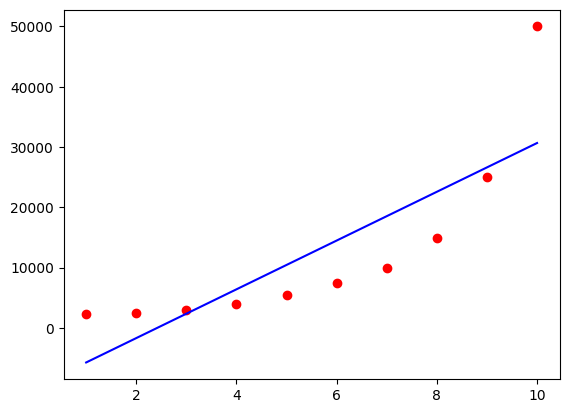

In [477]:
plt.scatter(x,y , color='red')
plt.plot(x , ling_reg.predict(x) , color='blue')
plt.show()

In [478]:
print('Linear Tree R2 degeri')
print(r2_score(y , ling_reg.predict(x)))

Linear Tree R2 degeri
0.6690412331929894


In [479]:
from sklearn.preprocessing import PolynomialFeatures
# Doğrusal olmayan ilişkileri modellemek için bağımsız değişkenin (X) polinom derecelerini oluşturur.
poly_reg = PolynomialFeatures(degree=2)
# Bu parametre, kaçıncı dereceden polinom oluşturulacağını belirler.
# Burada 2 yazdığı için:
# x
# x²
# şeklinde iki özellik üretilecektir (ve sabit 1 terimi de eklenir).
x_ploy = poly_reg.fit_transform(x)
x_ploy

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

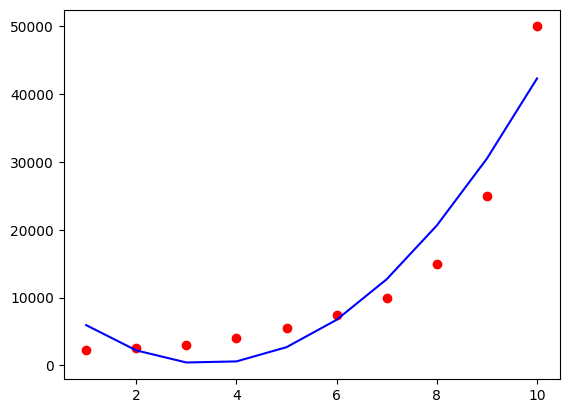

In [480]:
ling_reg2 = LinearRegression()
ling_reg2.fit(x_ploy , y)
plt.scatter(x,y , color = 'red')
plt.plot(x, ling_reg2.predict(poly_reg.fit_transform(x)) , color='blue')
plt.show()

In [481]:
print('Polynomial Tree R2 degeri')
print(r2_score(y , ling_reg2.predict(poly_reg.fit_transform(x))))

Polynomial Tree R2 degeri
0.9162082221443942


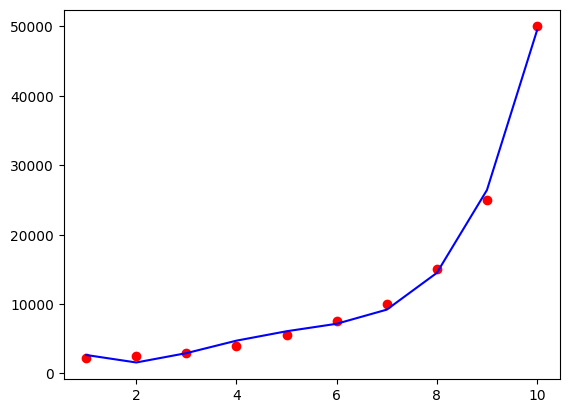

In [482]:
poly_reg3 = PolynomialFeatures(degree=4)
x_ploy3 = poly_reg3.fit_transform(x)
ling_reg3 = LinearRegression()
ling_reg3.fit(x_ploy3 , y)
plt.scatter(x,y , color = 'red')
plt.plot(x, ling_reg3.predict(poly_reg3.fit_transform(x)) , color='blue')
plt.show()

# Destek Vektör Regresyonu(Support Vector Regression)

In [483]:
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
x_olcekli = sc1.fit_transform(x)

sc2 = StandardScaler()
y_olcekli = sc2.fit_transform(y.values.reshape(-1,1))

In [484]:
from sklearn.svm import SVR
svr_reg = SVR(kernel='rbf')
svr_reg.fit(x_olcekli , y_olcekli.ravel())

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


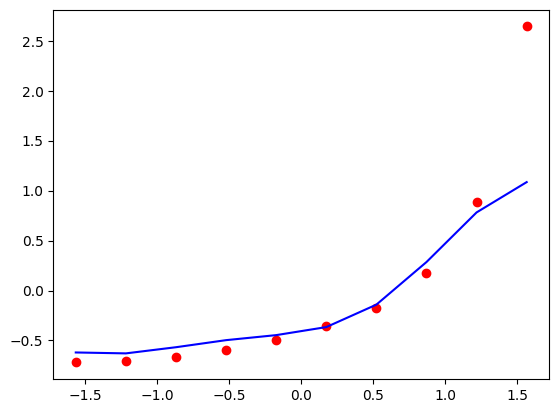

In [485]:
plt.scatter(x_olcekli , y_olcekli , color='red')
plt.plot(x_olcekli , svr_reg.predict(x_olcekli) , color = 'blue')
plt.show()

In [486]:
print('SVR R2 degeri')
print(r2_score(y_olcekli , svr_reg.predict(x_olcekli)))

SVR R2 degeri
0.7513836788854973


# Karar Ağacı(Decision Tree)

In [487]:
veriler = pd.read_csv('maaslar.csv')

In [488]:
x = veriler.iloc[:,1:2].values
y = veriler.iloc[:,2:].values
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [489]:
from sklearn.tree import DecisionTreeRegressor
# Karar ağacı, eğitim verisindeki değer aralıklarıyla çalışır.❗ Yani dışarı taşmaz. Tahminler her zaman eğitim verisindeki y değerleri arasında olur.
r_dt = DecisionTreeRegressor(random_state=0)
r_dt.fit(x,y)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


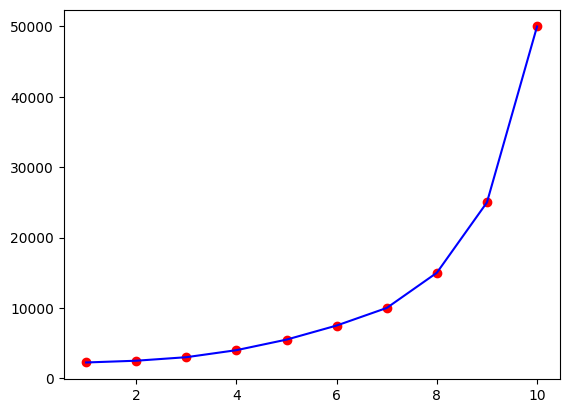

In [490]:
plt.scatter(x , y , color='red')
plt.plot(x , r_dt.predict(x) ,color='blue')
plt.show()

# Rassal Ağaçlar (Random Forest)

In [491]:
veriler = pd.read_csv('maaslar.csv')

In [492]:
x = veriler.iloc[:,1:2].values
y = veriler.iloc[:,2:].values
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [493]:
print('Decision Tree R2 degeri')
print(r2_score(y , r_dt.predict(x)))

Decision Tree R2 degeri
1.0


In [494]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=10,random_state=0)
# n_estimators parametresi kaç tane Karar Ağacı(Decision Tree) çizeleceğini belirliyoruz
rf_reg.fit(x , y.ravel())
print(rf_reg.predict([[6.5]]).astype(int))

[8350]


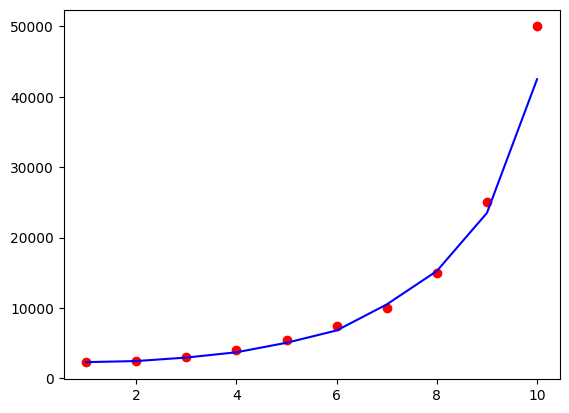

In [495]:
plt.scatter(x,y , color='red')
plt.plot(x , rf_reg.predict(x) , color='blue')
plt.show()

# Tahmin (Predicition) Değerlendirme ve Metotların Karşılaitırılması

# ✅ 1. R-square (R²) nedir?
Açıklanan varyans oranıdır.

Bir modelin, hedef (bağımlı) değişkendeki toplam değişkenliğin ne kadarını açıkladığını gösterir.
Değer aralığı: 0 ≤ R² ≤ 1

R² = 1: Model veriye %100 uyum sağlar.

R² = 0: Model hiçbir şeyi açıklayamıyor demektir.

🔧 Ne zaman kullanılır?
Modelin doğruluğunu ölçmek istediğinde

Özellikle tek değişkenli doğrusal regresyonda

#  2. Adjusted R-square (Düzeltilmiş R²) nedir?
R²’nin, modele eklenen değişken sayısına göre düzeltilmiş halidir.

Yeni değişkenler ekledikçe R² her zaman artar, bu yanıltıcıdır.
Adjusted R², sadece gerçekten faydalı değişkenlerin modelde tutulmasını sağlar.

🔧 Neden önemli?
Çoklu regresyon modelinde,

Gereksiz (etkisiz) değişkenleri eklersen Adjusted R² düşebilir.

Model seçimi yaparken çok kullanılır.

🔧 Ne zaman hangisini kullanmalısın?
Tek bir bağımsız değişken varsa:
→ R² yeterlidir.

Birden fazla bağımsız değişken varsa (çoklu regresyon):
→ Adjusted R² kullan. Çünkü gereksiz değişkenleri fark etmeni sağlar.

In [496]:
from sklearn.metrics import r2_score
print('Random Forest R2 degeri')
print(r2_score(y , rf_reg.predict(x)))

Random Forest R2 degeri
0.9704434230386582


In [497]:
print('Linear Tree R2 degeri')
print(r2_score(y , ling_reg.predict(x)))

print('Polynomial Tree R2 degeri')
print(r2_score(y , ling_reg2.predict(poly_reg.fit_transform(x))))

print('SVR R2 degeri')
print(r2_score(y_olcekli , svr_reg.predict(x_olcekli)))

print('Decision Tree R2 degeri')
print(r2_score(y , r_dt.predict(x)))

Linear Tree R2 degeri
0.6690412331929894
Polynomial Tree R2 degeri
0.9162082221443942
SVR R2 degeri
0.7513836788854973
Decision Tree R2 degeri
1.0


c:\Users\erena\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
